In [ ]:
"""This script computes a scatterplot between the number of LinkedIn users and the gdp per capita of each country."""

In [1]:
import pandas as pd
import country_converter as coco
# import linkedin user data
df = pd.read_csv('../Data/linkedin-users-by-country-2024.csv')
df["country_code"]=coco.convert(
                names=df.country, to="ISO3", not_found="unknown"
            )

# import population data
pop = pd.read_csv('../Data/population.csv')
# take 2019 as year of interest
pop = pop[pop['Time'] == 2019]

#import gdp data
gdp= pd.read_csv('../Data/gdp.csv')

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_91424/3157605488.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pop = pd.read_csv('../Data/population.csv')


In [2]:
# Merge the dataframes
pop = pop[['ISO3_code', 'TPopulation1Jan']]
gdp = gdp[['Country_Code', '2019']]

df = df.merge(pop, left_on='country_code', right_on='ISO3_code', how='left')
df = df.merge(gdp, left_on='country_code', right_on='Country_Code', how='left')
# rename 2019 to gdp
df = df.rename(columns={'2019': 'gdp'})
#rename TPopulation1Jan to population
df = df.rename(columns={'TPopulation1Jan': 'population'})

In [3]:
# compute gdp per capita values
df["gdp_capita"] = df["gdp"] / df["population"]
df["users_per_capita"] = df["LinkedInUsersInThousands2023"] / df["population"]
df["gdp_capita"] = (df["gdp_capita"]/1000).astype(float)

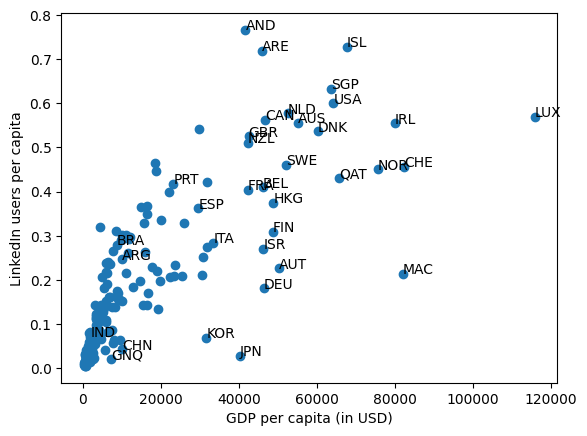

In [4]:
# create scatterplot with users per capita on the y-axis and gdp per capita on the x-axis
import matplotlib.pyplot as plt
plt.scatter(df["gdp_capita"], df["users_per_capita"])
plt.xlabel("GDP per capita (in USD)")
plt.ylabel("LinkedIn users per capita")
# for gdp_capita > 0.2 and users_per_capita < 0.1 write the country code
for i in range(len(df)):
    if (df["gdp_capita"][i] > 20000) and (df["users_per_capita"][i] < 0.1):
        plt.text(df["gdp_capita"][i], df["users_per_capita"][i], df["country_code"][i])
    elif (df["gdp_capita"][i] > 40000):
        plt.text(df["gdp_capita"][i], df["users_per_capita"][i], df["country_code"][i])
    elif df.country_code[i] in ["CHN","GNQ","ESP","PRT","ITA","IND","BRA", "ARG"]:
        plt.text(df["gdp_capita"][i], df["users_per_capita"][i], df["country_code"][i])


plt.savefig('scatterplot.pdf')